# Random Forest Regressor
Neste notebook usamos o Random Forest Regressor para tentar prever a coluna 'price' (preço) do dataset de veículos do craiglist.

In [6]:
from Utils import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['lines.linewidth'] = 2.0

In [30]:
train_df = load_vehicles_dataset_and_set_types_2('../datasets/train_vehicles.csv')
train_df = set_categories_as_codes(train_df)

([<matplotlib.axis.XTick at 0x7fcc3f629450>,
 [Text(0, 0, 'region'),
  Text(1, 0, 'year'),
  Text(2, 0, 'manufacturer'),
  Text(3, 0, 'model'),
  Text(4, 0, 'condition'),
  Text(5, 0, 'cylinders'),
  Text(6, 0, 'fuel'),
  Text(7, 0, 'odometer'),
  Text(8, 0, 'title_status'),
  Text(9, 0, 'transmission'),
  Text(10, 0, 'drive'),
  Text(11, 0, 'type'),
  Text(12, 0, 'paint_color'),
  Text(13, 0, 'state'),
  Text(14, 0, 'lat'),
  Text(15, 0, 'long'),
  Text(16, 0, 'price')])

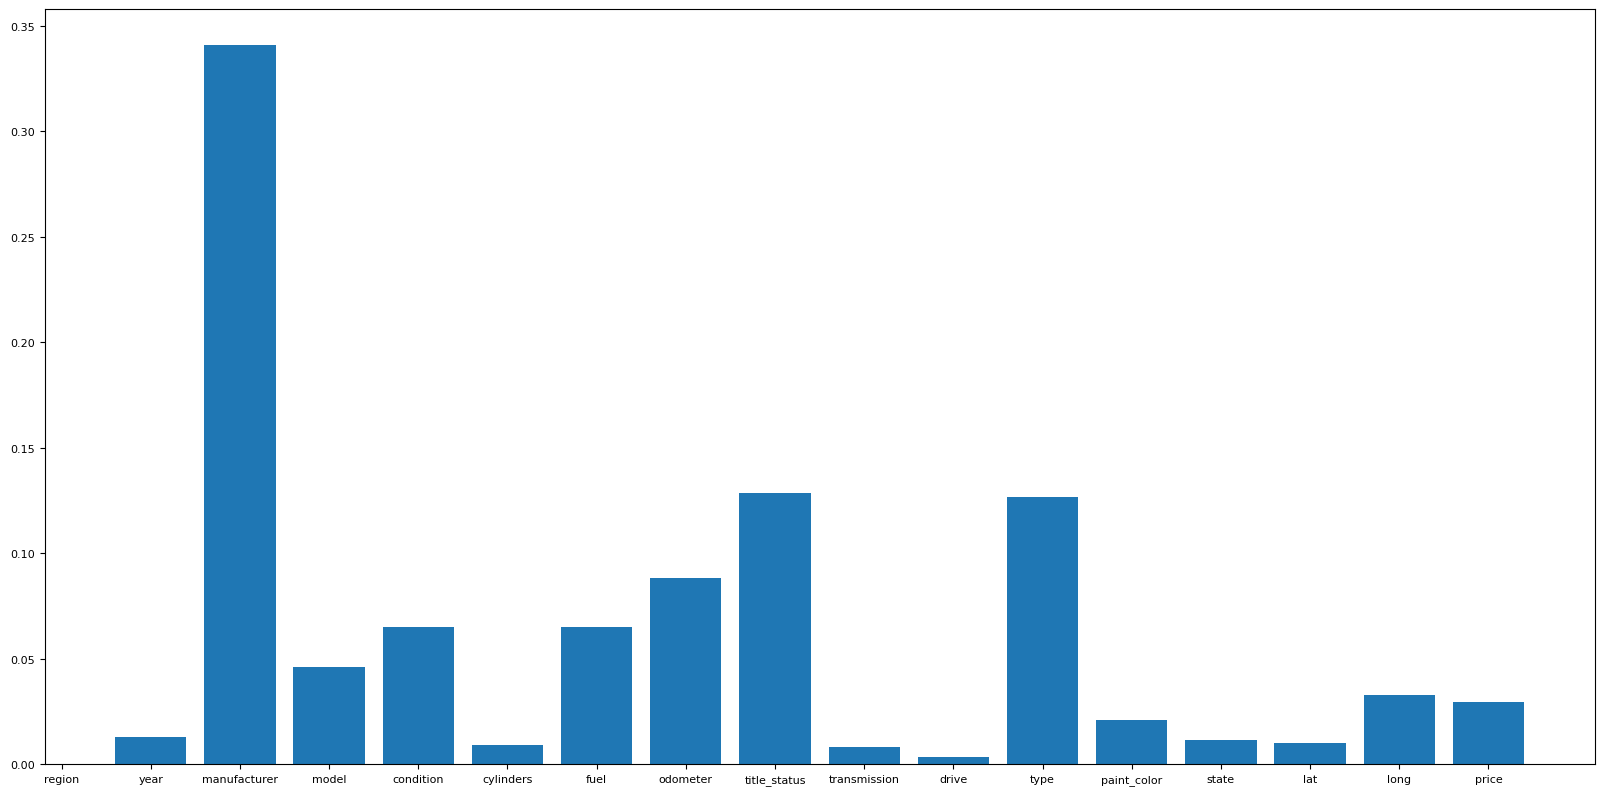

In [31]:
regr = RandomForestRegressor()
regr.fit(train_df.drop(columns=['price']).values, train_df[['price']].values.reshape(train_df[['price']].shape[0],))

plt.bar(np.arange(1, 17), regr.feature_importances_)
plt.xticks(np.arange(0, 17), train_df.columns)

## Prevendo dataset de treino

In [32]:
predict = regr.predict(train_df.drop(columns=['price']))

calculate_r2_and_mse(train_df, 'price')

R2:      0.983
MSE:     1760474.203


## Prevendo dataset de teste

In [36]:
test_df = load_vehicles_dataset_and_set_types_2('../datasets/test_vehicles.csv')
test_df = set_categories_as_codes(test_df)

predict = regr.predict(test_df.drop(columns=['price']))

calculate_r2_and_mse(test_df, 'price')

R2:      0.789
MSE:     22236530.519
